# Mental Health

## Import Data

In [70]:
#Import data as usual
import pandas as pd

train_df = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

## Clean and Format the Data

Rename some columns to make it simpler

In [71]:
#Rename it because it is so long so we make it shorter

train_df = train_df.rename(columns={
    "Have you ever had suicidal thoughts ?": "Suicidal Thoughts",
    "Family History of Mental Illness": "Family History",
    "Working Professional or Student": "Work/Study"
})

test_df = test_df.rename(columns={
    "Have you ever had suicidal thoughts ?": "Suicidal Thoughts",
    "Family History of Mental Illness": "Family History",
    "Working Professional or Student": "Work/Study"
})

Some Column can be merged to fill the NaN values :

1. NaN values in profession can be filled with student values
2. NaN values in academic pressure can be filled with work pressure
3. NaN values in study satisfaction can be filled with work satisfaction

Aftere merged it we dont need column with NaN values anymore, and we need to rename some column to make it more clear

In [72]:
#Merge each column to fill the NaN values

train_df["Profession"] = train_df["Profession"].fillna(train_df["Work/Study"])
train_df["Work Pressure"] = train_df["Work Pressure"].fillna(train_df["Academic Pressure"])
train_df["Job Satisfaction"] = train_df["Job Satisfaction"].fillna(train_df["Study Satisfaction"])

#Drop Column that we dont need anymore
train_df = train_df.drop(["id", "Academic Pressure", "Work/Study", "Study Satisfaction"], axis=1)

#Rename The Column
train_df = train_df.rename(columns={
    "Work Pressure": "Pressure",
    "Job Satisfaction": "Satisfaction"
})

In [73]:
# We need to check how many data on each profession
pd.set_option('display.max_rows', None)
job_counts = train_df['Profession'].value_counts()
print(job_counts)

Profession
Student                   27874
Teacher                   24906
Working Professional       8764
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           13

In [74]:
pd.set_option('display.max_rows', None)
city_count = train_df['City'].value_counts()
print(city_count)

City
Kalyan                6591
Patna                 5924
Vasai-Virar           5765
Kolkata               5689
Ahmedabad             5613
Meerut                5528
Ludhiana              5226
Pune                  5210
Rajkot                5207
Visakhapatnam         5176
Srinagar              5074
Mumbai                4966
Indore                4872
Agra                  4684
Surat                 4636
Varanasi              4606
Vadodara              4568
Hyderabad             4496
Kanpur                4398
Jaipur                4328
Thane                 4289
Lucknow               4280
Nagpur                4209
Bangalore             4123
Chennai               4044
Ghaziabad             3620
Delhi                 3593
Bhopal                3475
Faridabad             3268
Nashik                3144
Mihir                    7
Nandini                  4
Mahi                     3
Vidya                    3
City                     3
Pratyush                 3
Harsha                 

In [75]:
pd.set_option('display.max_rows', None)
degree_count = train_df['Degree'].value_counts()
print(degree_count)

Degree
Class 12                14729
B.Ed                    11691
B.Arch                   8742
B.Com                    8113
B.Pharm                  5856
BCA                      5739
M.Ed                     5668
MCA                      5234
BBA                      5030
BSc                      5027
MSc                      4879
LLM                      4647
M.Pharm                  4537
M.Tech                   4475
B.Tech                   4425
LLB                      4348
BHM                      4305
MBA                      3818
BA                       3750
ME                       3632
MD                       3383
MHM                      3286
BE                       3104
PhD                      3103
M.Com                    3094
MBBS                     3082
MA                       2887
M.Arch                      5
UX/UI Designer              4
B.Sc                        3
Kalyan                      3
M                           3
BArch                       2
MEd

We found another problem, as you can see in profession column there are a lot of categories, and a lot of categories can make the model overfit, so my solution is change the profesion to 'others' if the profession is below 10

In [76]:
#Make Profession to 'other' when it below 10
profession_count = train_df['Profession'].value_counts()
low_profession_count = profession_count[profession_count < 10].index
train_df['Profession'] = train_df['Profession'].apply(lambda x: 'Other' if x in low_profession_count else x)

#Make City to 'other' when it below 10
city_count = train_df['City'].value_counts()
low_city_count = city_count[city_count < 10].index
train_df['City'] = train_df['City'].apply(lambda x: 'Other' if x in low_city_count else x)

#Make Degree to 'other' when it below 10
degree_count = train_df['Degree'].value_counts()
low_degree_count = degree_count[degree_count < 10].index
train_df['Degree'] = train_df['Degree'].apply(lambda x: 'Other' if x in low_degree_count else x)

Models work better with numerical, so we can convert some binary data to '0' and '1'.

In [77]:
train_df['Gender'] = train_df['Gender'].map({'Male': 1, 'Female': 0})
train_df['Suicidal Thoughts'] = train_df['Suicidal Thoughts'].map({'Yes': 1, 'No': 0})
train_df['Family History'] = train_df['Family History'].map({'Yes': 1, 'No': 0})
train_df['Dietary Habits'] = train_df['Dietary Habits'].map({'Healthy': 1, 'Moderate': 0, 'Unhealthy': -1})

We need to fix the sleep duration because it has too much value, we need to squeeze to make it fewer

In [78]:
train_df["Sleep Duration"] = train_df["Sleep Duration"].map({
    "3-4 hours": 4,
    "4-5 hours": 4,
    "Less than 5 hours": 4,
    "5-6 hours": 5,
    "6-7 hours": 6,
    "7-8 hours": 7,
    "More than 8 hours": 8
})

In [79]:
train_df["CGPA"]  = train_df["CGPA"].fillna(-1)

In [80]:
train_df.head()

,Name,Gender,Age,City,Profession,Pressure,CGPA,Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression
0,Aaradhya,0,49.0,Ludhiana,Chef,5.0,-1.00,2.0,8.0,1.0,BHM,0,1.0,2.0,0,0
1,Vivan,1,26.0,Varanasi,Teacher,4.0,-1.00,3.0,4.0,-1.0,LLB,1,7.0,3.0,0,1
2,Yuvraj,1,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5.0,1.0,B.Pharm,1,3.0,1.0,0,1
3,Yuvraj,1,22.0,Mumbai,Teacher,5.0,-1.00,1.0,4.0,0.0,BBA,1,10.0,1.0,1,1
4,Rhea,0,30.0,Kanpur,Business Analyst,1.0,-1.00,1.0,5.0,-1.0,BBA,1,9.0,4.0,1,0


Distribution beetween basic data

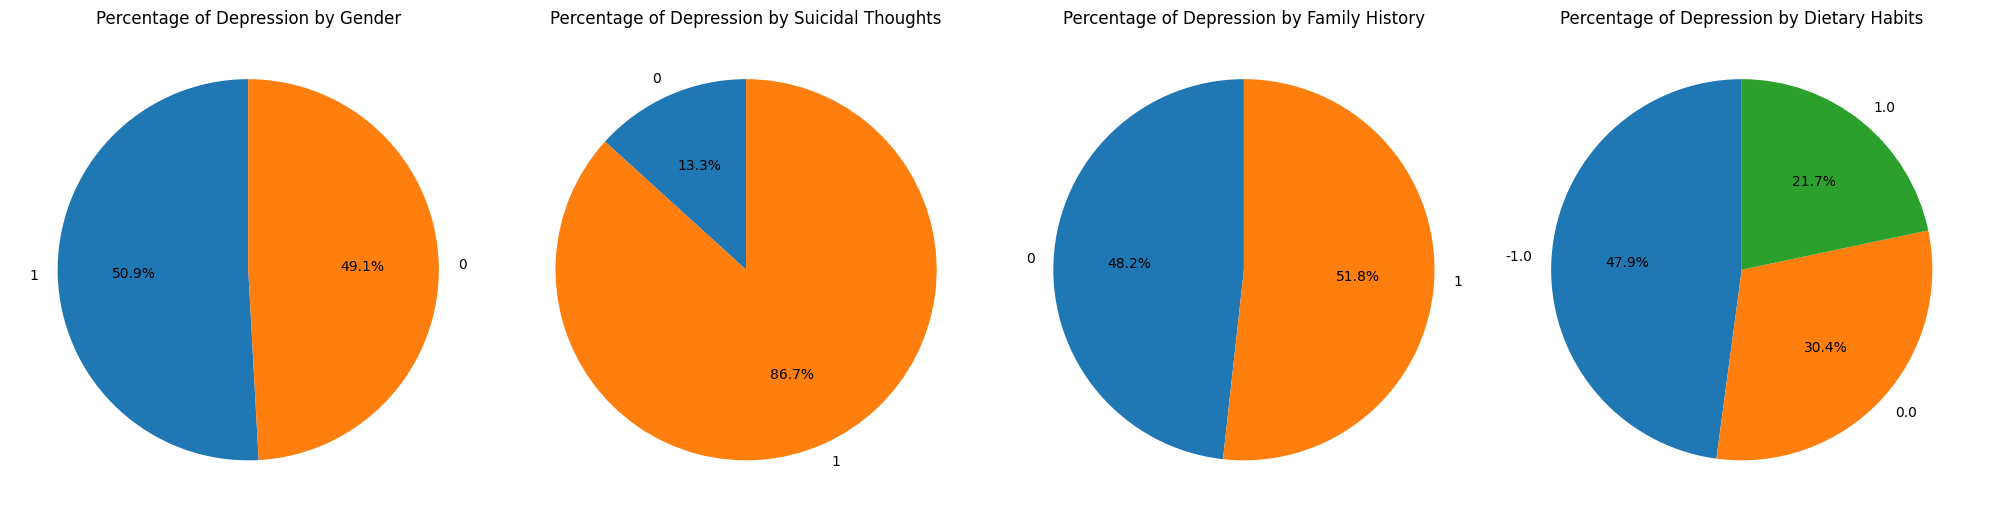

In [81]:
import matplotlib.pyplot as plt

# Fungsi untuk menghitung persentase depresi berdasarkan kolom tertentu
def plot_depression_percentage(train_df, column, ax):
    # Mengelompokkan data berdasarkan kolom dan menghitung persentase depresi
    depression_counts = train_df[train_df["Depression"] == 1][column].value_counts()
    total_counts = train_df[column].value_counts()
    depression_percentage = (depression_counts / total_counts) * 100

    # Mengisi NaN dengan 0 untuk kategori yang tidak memiliki kasus depresi
    depression_percentage = depression_percentage.fillna(0)

    # Membuat pie chart pada sumbu yang sudah disediakan
    ax.pie(depression_percentage, labels=depression_percentage.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Percentage of Depression by {column}')

# Membuat plot dengan subplots (horizontal layout)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))  # 1 baris dan 4 kolom

# Membuat pie chart untuk setiap kolom yang diinginkan
columns = ["Gender", "Suicidal Thoughts", "Family History", "Dietary Habits"]
for i, col in enumerate(columns):
    plot_depression_percentage(train_df, col, axes[i])

plt.tight_layout()  # Menyusun layout agar tidak tumpang tindih
plt.show()


From the chart above we know that depression is often start by suicidal thoughts with almost 87%, and maybe dietary habits too. gender and family history is not so significant to depression

Now we fix the test data to be similar with train data to make the model recognize it easily

In [82]:
#Merge each column to fill the NaN values

test_df["Profession"] = test_df["Profession"].fillna(test_df["Work/Study"])
test_df["Work Pressure"] = test_df["Work Pressure"].fillna(test_df["Academic Pressure"])
test_df["Job Satisfaction"] = test_df["Job Satisfaction"].fillna(test_df["Study Satisfaction"])

#Drop Column that we dont need anymore
test_df = test_df.drop(["id", "Academic Pressure", "Work/Study", "Study Satisfaction"], axis=1)

#Rename The Column
test_df = test_df.rename(columns={
    "Work Pressure": "Pressure",
    "Job Satisfaction": "Satisfaction"
})

#Make Profession to 'other' when it below 10
profession_count = test_df['Profession'].value_counts()
low_profession_count = profession_count[profession_count < 10].index
test_df['Profession'] = test_df['Profession'].apply(lambda x: 'Other' if x in low_profession_count else x)

#Make City to 'other' when it below 10
city_count = test_df['City'].value_counts()
low_city_count = city_count[city_count < 10].index
test_df['City'] = test_df['City'].apply(lambda x: 'Other' if x in low_city_count else x)

#Make Degree to 'other' when it below 10
degree_count = test_df['Degree'].value_counts()
low_degree_count = degree_count[degree_count < 10].index
test_df['Degree'] = test_df['Degree'].apply(lambda x: 'Other' if x in low_degree_count else x)

test_df['Gender'] = test_df['Gender'].map({'Male': 1, 'Female': 0})
test_df['Suicidal Thoughts'] = test_df['Suicidal Thoughts'].map({'Yes': 1, 'No': 0})
test_df['Family History'] = test_df['Family History'].map({'Yes': 1, 'No': 0})
test_df['Dietary Habits'] = test_df['Dietary Habits'].map({'Healthy': 1, 'Moderate': 0, 'Unhealthy': -1})

test_df["Sleep Duration"] = test_df["Sleep Duration"].map({
    "3-4 hours": 4,
    "4-5 hours": 4,
    "Less than 5 hours": 4,
    "5-6 hours": 5,
    "6-7 hours": 6,
    "7-8 hours": 7,
    "More than 8 hours": 8
})

test_df["CGPA"]  = test_df["CGPA"].fillna(-1)

In [83]:
test_df.head()

,Name,Gender,Age,City,Profession,Pressure,CGPA,Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History
0,Shivam,1,53.0,Visakhapatnam,Judge,2.0,-1.00,5.0,4.0,0.0,LLB,0,9.0,3.0,1
1,Sanya,0,58.0,Kolkata,Educational Consultant,2.0,-1.00,4.0,4.0,0.0,B.Ed,0,6.0,4.0,0
2,Yash,1,53.0,Jaipur,Teacher,4.0,-1.00,1.0,7.0,0.0,B.Arch,1,12.0,4.0,0
3,Nalini,0,23.0,Rajkot,Student,5.0,6.84,1.0,8.0,0.0,BSc,1,10.0,4.0,0
4,Shaurya,1,47.0,Kalyan,Teacher,5.0,-1.00,5.0,7.0,0.0,BCA,1,3.0,4.0,0


In [89]:
X = train_df.drop(columns=['Depression'])
y = train_df['Depression']

In [94]:
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer

# Tentukan kolom numerik dan kategorikal
numerical_cols = ["Age", "Pressure", "Satisfaction", "Sleep Duration", "Dietary Habits", "Suicidal Thoughts", "Work/Study Hours", "Financial Stress", "Family History"]
categorical_cols = ["Name", "City", "Profession", "Degree"]

# Pisahkan kolom-kolom
X_numerical = X[numerical_cols]
X_categorical = X[categorical_cols]

# Menggunakan One-Hot Encoding untuk kolom kategorikal
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Gabungkan kembali kolom numerik dan kategorikal
X_final = pd.concat([X_numerical, X_categorical_encoded], axis=1)

# Membagi data menjadi training dan validation set
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Definisikan hyperparameter dan objective function
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),  # Ganti dengan suggest_float(log=True)
        'depth': trial.suggest_int('depth', 4, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 0, 1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'loss_function': 'Logloss',
        'eval_metric': 'Accuracy',
        'logging_level': 'Silent',
        'random_seed': 42,  # Pastikan untuk mengganti SEED dengan nilai konkret jika belum didefinisikan
    }

    model = CatBoostClassifier(**params)
    
    # Melatih model
    model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=0, early_stopping_rounds=50)
    
    # Prediksi dan evaluasi
    preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, preds)
    
    return accuracy

# Optimasi menggunakan Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)  # Sesuaikan jumlah trial sesuai kebutuhan

# Tampilkan parameter terbaik
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2024-11-14 03:13:53,048] A new study created in memory with name: no-name-20f1433c-4622-4f48-a6b4-2d4b3a4ce173
[I 2024-11-14 03:14:27,616] Trial 0 finished with value: 0.9382018479033405 and parameters: {'iterations': 858, 'learning_rate': 0.006799272188502982, 'depth': 11, 'l2_leaf_reg': 3.7615145661123677, 'bagging_temperature': 0.43327403151639243, 'random_strength': 0.6893926176540921, 'border_count': 56}. Best is trial 0 with value: 0.9382018479033405.
[I 2024-11-14 03:14:39,466] Trial 1 finished with value: 0.935820895522388 and parameters: {'iterations': 487, 'learning_rate': 0.6470360049189842, 'depth': 12, 'l2_leaf_reg': 4.2123385363579136, 'bagging_temperature': 0.13853802344409227, 'random_strength': 0.5210104360311062, 'border_count': 65}. Best is trial 0 with value: 0.9382018479033405.
[I 2024-11-14 03:14:49,964] Trial 2 finished with value: 0.939907604832978 and parameters: {'iterations': 351, 'learning_rate': 0.0749817393162308, 'depth': 8, 'l2_leaf_reg': 1.6987168942

Best parameters: {'iterations': 417, 'learning_rate': 0.2041024834128031, 'depth': 4, 'l2_leaf_reg': 5.040929776773708, 'bagging_temperature': 0.5531875584000471, 'random_strength': 0.23548668770035375, 'border_count': 64}
Best accuracy: 0.9403340440653873


In [ ]:
# Pisahkan kolom numerik dan kategorikal di test_df
X_test_numerical = test_df[numerical_cols]
X_test_categorical = test_df[categorical_cols]

# Lakukan One-Hot Encoding pada kolom kategorikal
X_test_categorical_encoded = pd.get_dummies(X_test_categorical, drop_first=True)

# Gabungkan kolom numerik dan hasil encoding kolom kategorikal
X_test_final = pd.concat([X_test_numerical, X_test_categorical_encoded], axis=1)

# Pastikan kolom-kolom pada X_test_final sesuai dengan kolom pada X_train
X_test_final = X_test_final.reindex(columns=X_train.columns, fill_value=0)

# Prediksi dengan model yang sudah dilatih
predictions = model.predict(X_test_final)

# Masukkan prediksi ke dalam test_df
test_df['Depression'] = predictions

# Pilih hanya kolom 'id' dan 'Depression' untuk disimpan
submission_df = test_df[['id', 'Depression']]

# Simpan hasil prediksi ke dalam file CSV
output_file_path = '/kaggle/working/sub.csv'
submission_df.to_csv(output_file_path, index=False)

output_file_path